In [1]:
import sys
import pickle
import numpy as np
import tensorflow as tf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from preprocessing import get_nn_data
from lstm import build_model, make_pred
from plots_lstm import plot_loss, plot_comp 
from sklearn.metrics import mean_squared_error as mse 

## Neural network model 

Parameters of the models (constants for all cities in this case):

In [2]:
END_TRAIN_DATE = '2021-12-26'
END_DATE = '2023-07-02'

PREDICT_N = 4 # number of new days predicted
LOOK_BACK = 4 # number of last days used to make the prediction 
BATCH_SIZE = 1
EPOCHS =100
HIDDEN = 8
l1 = 1e-6
l2 = 1e-6
lr = 0.0001

Training the models without clusters:

%%time

for CITY in [2704302, 2927408, 2111300, 2211001,
            2800308, 2408102, 2304400, 2507507, 2611606]:
    FILENAME_DATA = f'../../data_single/dengue_{CITY}.csv'
    df = pd.read_csv(FILENAME_DATA)
    cols_to_drop = df.columns[df.columns.str.contains('est')]
    df.drop(cols_to_drop, axis=1, inplace=True)
    FEAT = df.shape[1]

    model = build_model(l1=l1, l2 = l2, hidden = HIDDEN, features = FEAT, 
                        predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=BATCH_SIZE, loss = 'msle', lr = lr)


    m_msle_all, h_msle_all, m_train_all, m_val_all = make_pred(model, CITY, 
                                                               doenca = 'dengue', epochs = EPOCHS, 
                                                               end_train_date = END_TRAIN_DATE, 
                                                               ratio= None, end_date = END_DATE,
                         predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'single',  filename = FILENAME_DATA)
             
    plot_loss(h_msle_all, title = 'Model loss - MSLE')

Training the models with clusters:

Compilation Time :  0.001953601837158203
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 102)]          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             7104      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                  

Epoch 32/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0033 - accuracy: 0.2937 - mape: 180.2669 - mse: 0.0054 - val_loss: 0.0035 - val_accuracy: 0.2645 - val_mape: 164.5777 - val_mse: 0.0051
Epoch 33/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0032 - accuracy: 0.3477 - mape: 160.1431 - mse: 0.0049 - val_loss: 0.0027 - val_accuracy: 0.3290 - val_mape: 146.5763 - val_mse: 0.0038
Epoch 34/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0037 - accuracy: 0.3305 - mape: 145.5244 - mse: 0.0060 - val_loss: 0.0030 - val_accuracy: 0.2839 - val_mape: 201.0954 - val_mse: 0.0045
Epoch 35/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0029 - accuracy: 0.3175 - mape: 193.8945 - mse: 0.0044 - val_loss: 0.0038 - val_accuracy: 0.2774 - val_mape: 285.2865 - val_mse: 0.0060
Epoch 36/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0038 - accuracy: 0.3477 - mape: 196.2998 - mse: 0.0061 - val_loss:

116/116 [==============================] - 1s 6ms/step - loss: 0.0024 - accuracy: 0.3218 - mape: 180.5187 - mse: 0.0035 - val_loss: 0.0023 - val_accuracy: 0.2387 - val_mape: 184.3540 - val_mse: 0.0031
Epoch 71/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0024 - accuracy: 0.3240 - mape: 183.4145 - mse: 0.0035 - val_loss: 0.0028 - val_accuracy: 0.3032 - val_mape: 174.6876 - val_mse: 0.0044
Epoch 72/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0025 - accuracy: 0.3391 - mape: 220.1178 - mse: 0.0037 - val_loss: 0.0025 - val_accuracy: 0.2903 - val_mape: 192.6370 - val_mse: 0.0033
Epoch 73/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0027 - accuracy: 0.3153 - mape: 173.1398 - mse: 0.0040 - val_loss: 0.0031 - val_accuracy: 0.2323 - val_mape: 145.9223 - val_mse: 0.0048
Epoch 74/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0025 - accuracy: 0.3305 - mape: 224.0995 - mse: 0.0036 - val_loss: 0.0032 - val

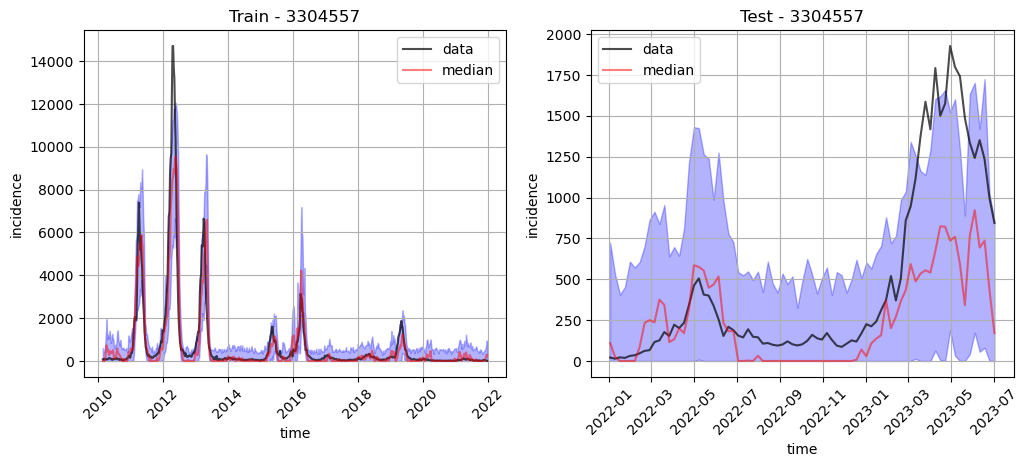

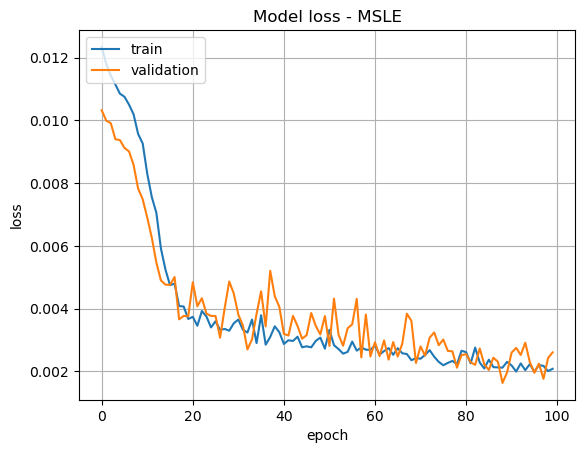

CPU times: user 2min 9s, sys: 5.9 s, total: 2min 15s
Wall time: 2min 4s


In [4]:
%%time

for CITY in [#2704302, 2927408, 2111300, 2211001,
           #2800308,
    #3106200
    3304557
    #2408102, 2304400, 2507507, 2611606
]:
    FILENAME_DATA = f'../../data_cluster/dengue_{CITY}_cluster.csv'
    df = pd.read_csv(FILENAME_DATA, index_col = 'Unnamed: 0')
    cols_to_drop = df.columns[df.columns.str.contains('est')]
    df.drop(cols_to_drop, axis=1, inplace=True)
    cols = df.shape[1]
    FEAT = 102#int((1 + 1 / 16) * cols) + 2

    model = build_model(l1=l1, l2 = l2, hidden = HIDDEN, features = FEAT, 
                        predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=BATCH_SIZE, loss = 'msle', lr = lr)


    m_msle_all, h_msle_all, m_train_all, m_val_all = make_pred(model, CITY, 
                                                               doenca = 'dengue', epochs = EPOCHS, 
                                                               end_train_date = END_TRAIN_DATE, 
                                                               ratio= None, end_date = END_DATE,
                         predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'cluster',  filename = FILENAME_DATA)
             
    plot_loss(h_msle_all, title = 'Model loss - MSLE')